---
# 타이타닉 탑승자의 생사여부 예측 

In [58]:
train_df <-read.csv("../Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [59]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [60]:
summary(train_df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

### 컬럼 내용 확인 
- Survied : 생존여부 ( 1: 생존, 0: 사망) -> target column:숫자 
- Pclass : 티켓등급 ( 1:1등급 , 2:2등급, 3: 3등급 )
- SibSp : sibling , 함께 탑승한 형제, 자매 , 배우자의 수 
- Parch : Parent and Children ,  함께 탑승한 부모, 자식의 수 
- Fare : 운임비 
- Cabin : 객실 번호 
- Embarked : 승선항구 , (C :Cherbourg(쉘부르,프랑스), Q: Queenstown(퀸즈타운, 아일랜드), S: Southampthon(사운샘프턴,영국))

In [61]:
# 각 컬럼별 NA 확인 
sum(is.na(train_df))
colSums(is.na(train_df))
# 나이에 NA 가 발생하므로 나이로 유의마한 데이터 얻기 힘듬. 177명을 제외한 나머지로 가능 

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [62]:
# train_df$Age가 NA인 것빼고 데이터셋 만들기 
head(subset(train_df,Age!= 'NA'))
nrow(subset(train_df,Age!= 'NA'))
# subset(train_df , !is.na(Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [63]:
# Survied(target Column) 기준으로 Dataset 정렬 
library(dplyr)
train_df<-arrange(train_df,(Survived))
print(train_df)

    PassengerId Survived Pclass
1             1        0      3
2             5        0      3
3             6        0      3
4             7        0      1
5             8        0      3
6            13        0      3
7            14        0      3
8            15        0      3
9            17        0      3
10           19        0      3
11           21        0      2
12           25        0      3
13           27        0      3
14           28        0      1
15           30        0      3
16           31        0      1
17           34        0      2
18           35        0      1
19           36        0      1
20           38        0      3
21           39        0      3
22           41        0      3
23           42        0      2
24           43        0      3
25           46        0      3
26           47        0      3
27           49        0      3
28           50        0      3
29           51        0      3
30           52        0      3
31      

In [64]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [65]:
# 정렬된 크기 확인하기 
dim(train_df)

[1] 891  12

---
# target Column : survied 분석 및 확인 

In [66]:
table(train_df$Survived)


  0   1 
549 342 

In [67]:
# Survived의 생존과 사망 count 확인 및 비율 계산 

# 사망자수 
nrow(subset(train_df,Survived == 0))

#생존자수 
nrow(subset(train_df,Survived == 1))

# 생존비율 =  생존자 / 전체 
round(nrow(subset(train_df,Survived == 1)) / nrow(train_df) * 100,2)

# 사망 비율 =  생존자 / 전체 
round(nrow(subset(train_df,Survived == 0)) / nrow(train_df) * 100,2)

[1] 549

[1] 342

[1] 38.38

[1] 61.62

In [68]:
SurvivedVector <-  c(sum(train_df$Survived == 0), sum(train_df$Survived == 1)) 
SurvivedVector

[1] 549 342

In [69]:
# 생존자와 사망자의 원형 그래프 만들기 
library(plotrix)

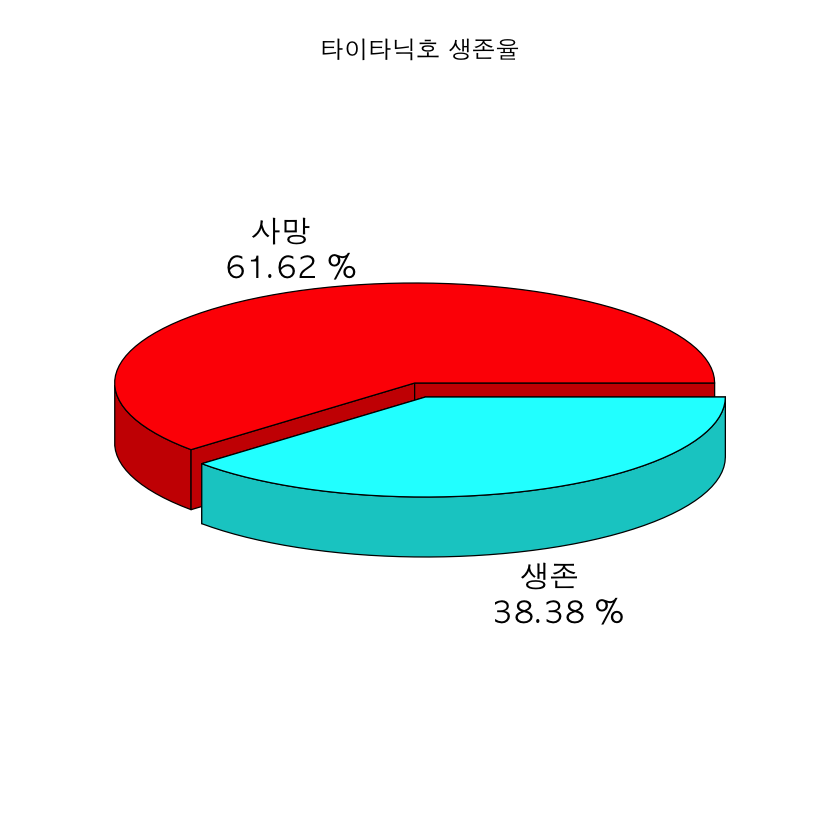

In [70]:
Survived <- c(sum(train_df$Survived == 0), sum(train_df$Survived == 1))      #전체 
사망률 <- round(nrow(subset(train_df,Survived == 0)) / nrow(train_df) * 100,2)
생존율 <- round(nrow(subset(train_df,Survived == 1)) / nrow(train_df) * 100,2)

구성 <- c('사망','생존')
ratio <- c(사망률,생존율)
label <- paste(구성,"\n",ratio,"%")
# 3D
options(warn=-1)
par(family ="AppleGothic",bg='white')
pie3D(Survived,
    labels= label,
    main = '타이타닉호 생존율',
    explode = 0.05
    )

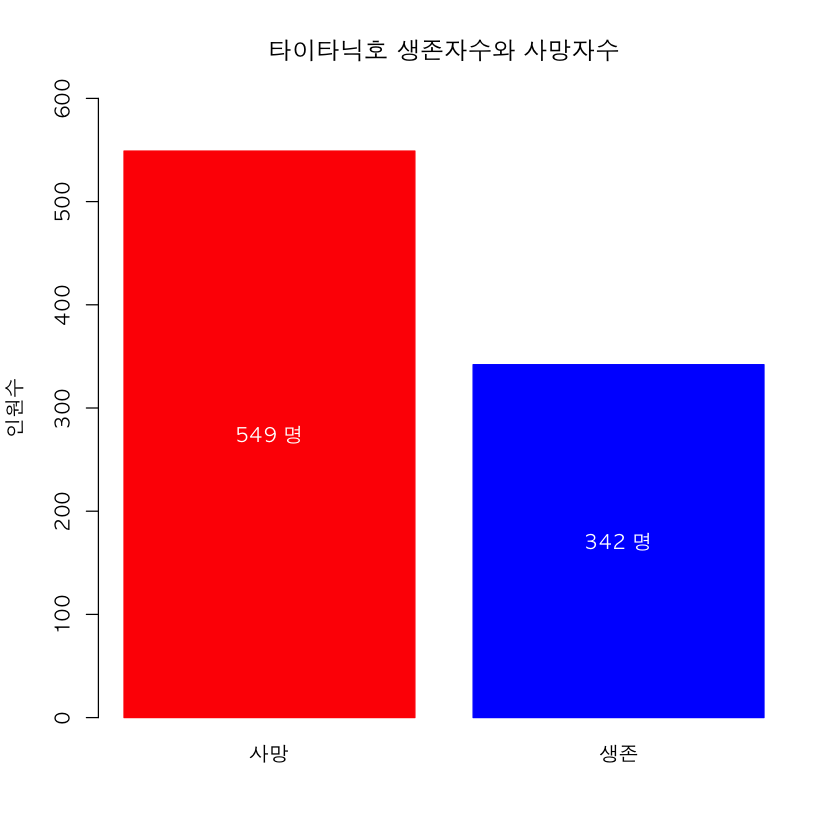

In [71]:
# 막대 그래프로 만들기 
options(warn=-1)
par(family ="AppleGothic",bg='white')
barplot(SurvivedVector,
        main = '타이타닉호 생존자수와 사망자수',
        ylim = c(0,600),
        col = c('red','blue'),
        names = c('사망','생존'),
        ylab = '인원수',         #y축 이름 
        border = c('red','blue'), #선색 맞추기
)
for(i in 1:length(SurvivedVector)) {
text(0.7 + (i-1)*1.2,SurvivedVector[i]/2,paste(SurvivedVector[i],'명'),col='white')
}

# Feature column 찾기 

In [72]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex 컬럼 확인

In [73]:
# sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [74]:
# 여성의 남성의 인원확인
 femaleCount <-nrow(subset(train_df,Sex == 'female')) ;femaleCount
 maleCount <-nrow(subset(train_df,Sex == 'male')) ;maleCount
 #nrow도 가능 

[1] 314

[1] 577

In [75]:
# 여성의 생존자수와 사망자수 
femaleSurvived <- nrow(subset(train_df,Sex == 'female' & Survived == 1)) ;femaleSurvived 
femaleDied <- nrow(subset(train_df,Sex == 'female' & Survived == 0)) ;femaleDied 
# 여성의 생존율과 사망률 
round(femaleSurvived / femaleCount*100,2) #여성생존율
round(femaleDied / femaleCount*100,2)   #여성사망률


[1] 233

[1] 81

[1] 74.2

[1] 25.8

In [76]:
# 남성의 생존자수와 사망자수 
maleSurvived <- nrow(subset(train_df,Sex == 'male' & Survived == 1)) ;maleSurvived 
maleDied <- nrow(subset(train_df,Sex == 'male' & Survived == 0)) ;maleDied 
# 남성의 생존율과 사망률 
nrow(subset(train_df,Sex == 'male' & Survived == 1)) / nrow(subset(train_df,Sex == 'male'))     #남성생존율
nrow(subset(train_df,Sex == 'male' & Survived == 0)) / nrow(subset(train_df,Sex == 'male'))     #남성사망률

[1] 109

[1] 468

[1] 0.1889081

[1] 0.8110919

> sex 칼럼은 feature로 적합 
[Survived] <- [Sex]

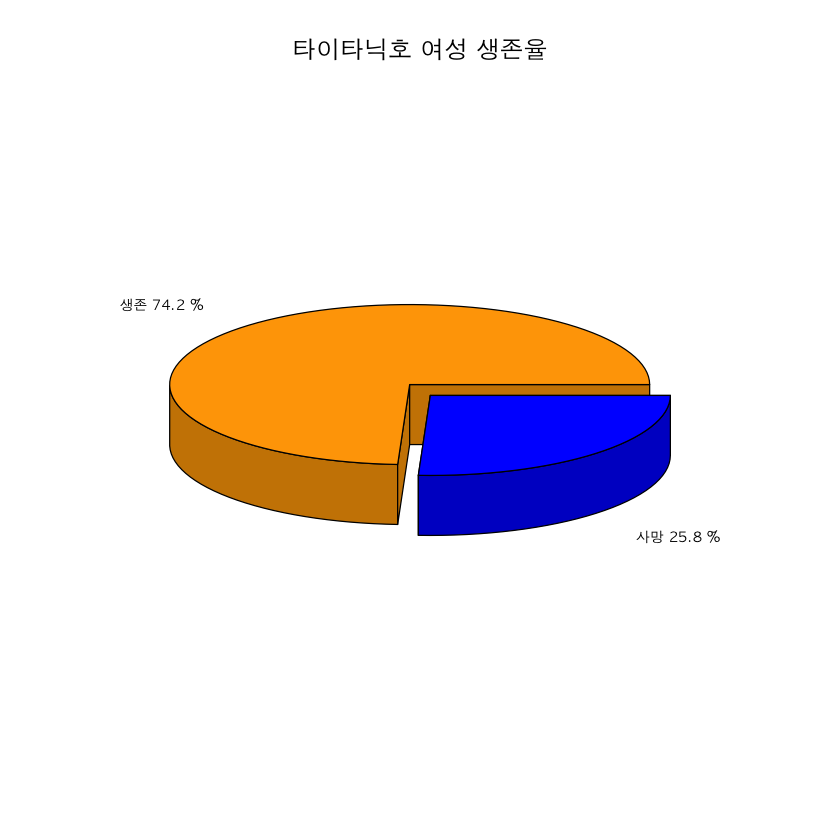

In [77]:
female_all <- c(femaleSurvived,femaleDied)
female_survived <- c(round(femaleSurvived / femaleCount*100,2)) 

female_died <- c(round(femaleDied/ femaleCount*100,2))
ratio <- c(female_survived,female_died)
label <- paste(c('생존','사망'),ratio,"%")
#3d
par(family='AppleGothic', bg='white')
pie3D(female_all,
labels= label,
    main = '타이타닉호 여성 생존율',
    col=c('orange','blue'),
    explode = 0.05,   
    labelcex = 0.7,
    radius=0.8
)

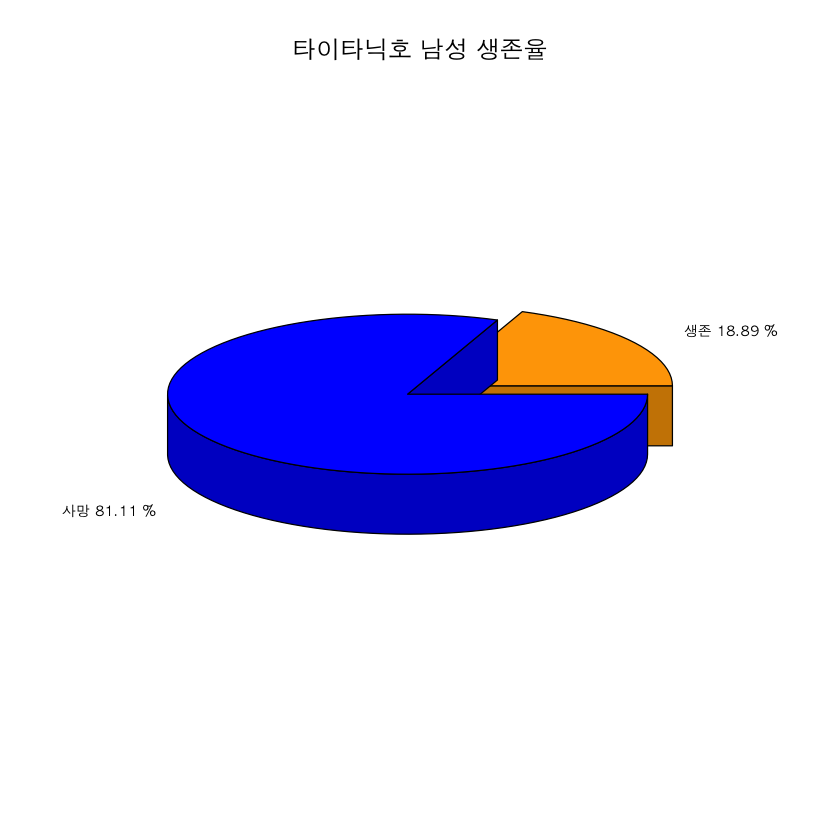

In [78]:
# 남성 그래프 
male_all <- c(maleSurvived,maleDied)
male_survived <- c(round(maleSurvived / maleCount*100,2)) 

male_died <- c(round(maleDied/ maleCount*100,2))
ratio <- c(male_survived,male_died)
label <- paste(c('생존','사망'),ratio,"%")
#3d
par(family='AppleGothic', bg='white')
pie3D(male_all,
labels= label,
    main = '타이타닉호 남성 생존율',
    col=c('orange','blue'),
    explode = 0.05,   
    labelcex = 0.7,
    radius=0.8
)

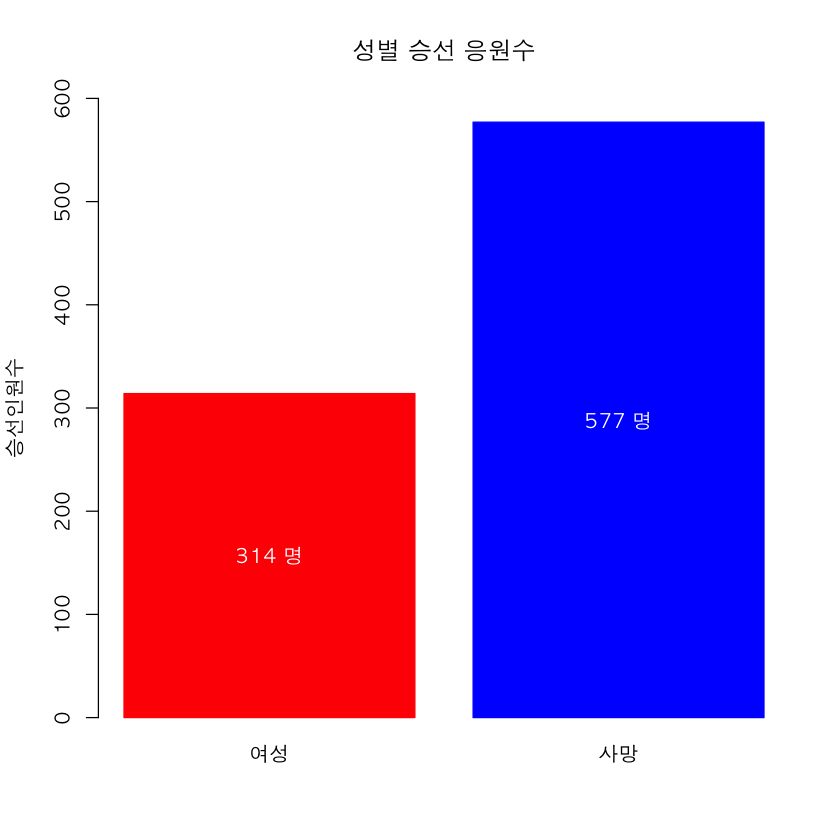

In [79]:
# 막대그래프로 만들기
allcount <- c( femaleCount, maleCount)
par(family='AppleGothic', bg='white')
barplot(allcount,   
        main = '성별 승선 응원수',
        ylim = c(0,600),
        col = c('red','blue'),
        names = c('여성','사망'),
         ylab = '승선인원수',         #y축 이름 
        border = c('red','blue'), #선색 맞추기
)

for(i in 1:length(allcount)) {
text(0.7 + (i-1)*1.2,allcount[i]/2,paste(allcount[i],'명'),col='white')
}


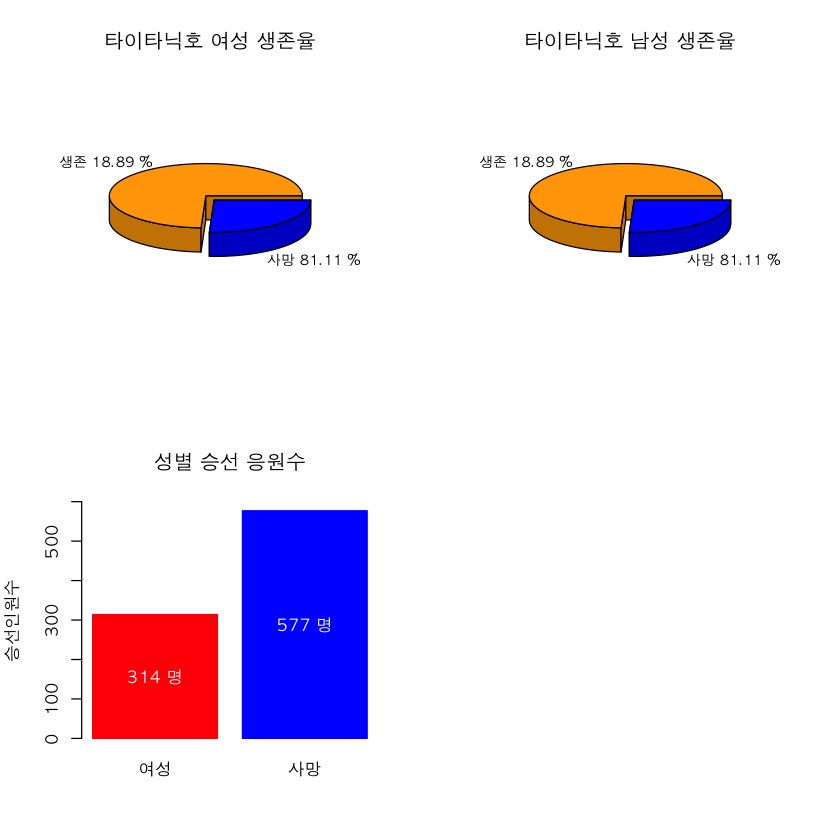

In [80]:
# 한번에 나타내기 
par(family = 'AppleGothic', bg = 'white' ,mfrow=c(2,2))
par(family='AppleGothic', bg='white')
pie3D(female_all,
labels= label,
    main = '타이타닉호 여성 생존율',
    col=c('orange','blue'),
    explode = 0.05,   
    labelcex = 0.7,
    radius=0.8
)
par(family='AppleGothic', bg='white')
pie3D(female_all,
labels= label,
    main = '타이타닉호 남성 생존율',
    col=c('orange','blue'),
    explode = 0.05,   
    labelcex = 0.7,
    radius=0.8
)
par(family='AppleGothic', bg='white')
barplot(allcount,   
        main = '성별 승선 응원수',
        ylim = c(0,600),
        col = c('red','blue'),
        names = c('여성','사망'),
         ylab = '승선인원수',         #y축 이름 
        border = c('red','blue'), #선색 맞추기
)

for(i in 1:length(allcount)) {
text(0.7 + (i-1)*1.2,allcount[i]/2,paste(allcount[i],'명'),col='white')
}


In [81]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [82]:
# 1등 객실의 여성 생존율 
female_one_all<- nrow(subset(train_df,Pclass == 1 & Sex == 'female')) ; female_one_all
female_one_survived<- nrow(subset(train_df,Pclass == 1 & Sex == 'female' & Survived == 1)) ; female_one_survived
female_one_died<- nrow(subset(train_df,Pclass == 1 & Sex == 'female' & Survived == 0)) ;female_one_died
cat("1등 객실의 여성 생존율은",female_one_survived,"/",female_one_all ,"," ,round(female_one_survived /female_one_all*100,2),"%" )

[1] 94

[1] 91

[1] 3

1등 객실의 여성 생존율은 91 / 94 , 96.81 %

In [83]:
# 2등 객실의 여성 생존율
female_two_all<- nrow(subset(train_df,Pclass == 2 & Sex == 'female')) ; female_two_all
female_two_survived<- nrow(subset(train_df,Pclass == 2 & Sex == 'female' & Survived == 1)) ; female_two_survived
female_two_died<- nrow(subset(train_df,Pclass == 2 & Sex == 'female' & Survived == 0)) ;female_two_died
cat("2등 객실의 여성 생존율은",female_two_survived,"/",female_two_all ,"," ,round(female_two_survived /female_two_all*100,2),"%" )

[1] 76

[1] 70

[1] 6

2등 객실의 여성 생존율은 70 / 76 , 92.11 %

In [84]:
# 3등 객실의 여성 생존율
female_three_all<- nrow(subset(train_df,Pclass == 3 & Sex == 'female')) ; female_three_all
female_three_survived<- nrow(subset(train_df,Pclass == 3 & Sex == 'female' & Survived == 1)) ; female_three_survived
female_three_died<- nrow(subset(train_df,Pclass == 3 & Sex == 'female' & Survived == 0)) ;female_three_died
cat("3등 객실의 여성 생존율은",female_three_survived,"/",female_three_all ,"," ,round(female_three_survived /female_three_all*100,2),"%" )

[1] 144

[1] 72

[1] 72

3등 객실의 여성 생존율은 72 / 144 , 50 %

In [85]:
# for문을 활용하여 각 객실의 여성과 남성의 생존율 검색하기 
생존율 <- c()
label <- c()
for(k in c('female','male')){
for(i in 1:length(unique(train_df$Pclass)))    {
female_all<- nrow(subset(train_df,Pclass == i &  Sex == k)) 
female_survived<- nrow(subset(train_df,Pclass == i & Sex == k & Survived == 1)) 
female_died<- nrow(subset(train_df,Pclass == i & Sex == k & Survived == 0)) 
생존율 <- append(생존율,round( nrow(subset(train_df,Pclass == i & Sex == k & Survived == 1)) /nrow(subset(train_df,Pclass == i &  Sex == k)) *100,2))
label <- append(label,paste(i,"객실","(",ifelse(k == 'female','여','남'),")",sep=""))

cat(i,"등 객실의",ifelse(k =='female',"여성","남성"), "생존율은",female_survived,"/",female_all ,"," ,round(female_survived /female_all*100,2),"%","\n" )
}
cat("...........................","\n")
}


1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
........................... 
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
........................... 


In [86]:
label

[1] "1객실(여)" "2객실(여)" "3객실(여)" "1객실(남)" "2객실(남)" "3객실(남)"

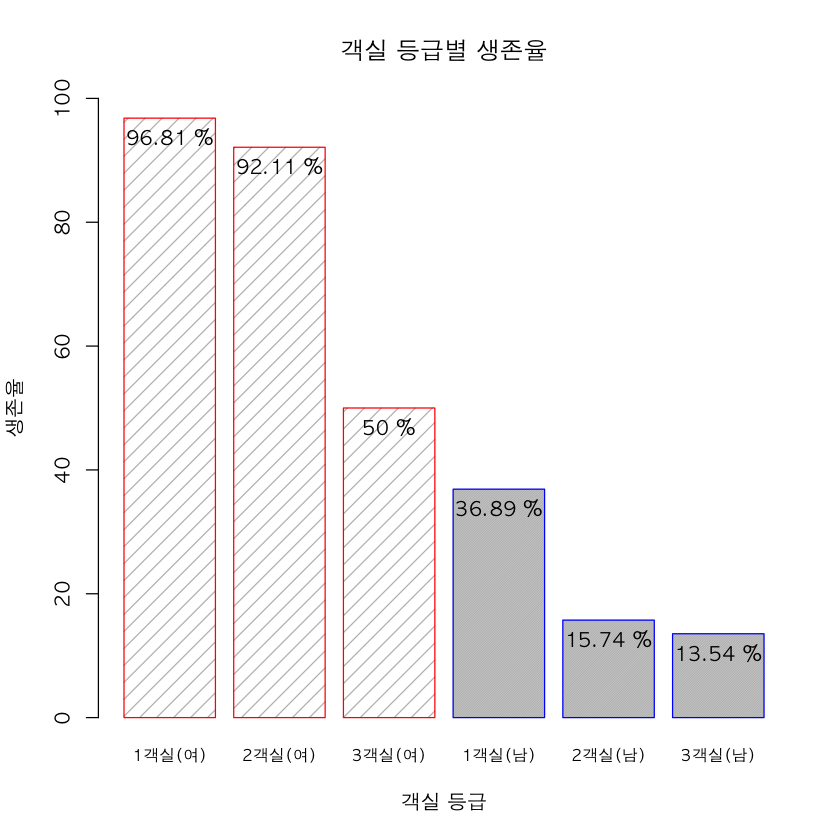

In [87]:
# 막대그래프로 그리기 
par(family='AppleGothic', bg='white')
barplot(생존율,
        main = '객실 등급별 생존율',
        ylim = c(0,100),
        xlab = '객실 등급',
        ylab = '생존율',
        den = c(rep(10,3),rep(100,3)),
        border = c(rep('red',3),rep('blue',3)),
        names = label,
        cex.names = 0.8,

)
for(i in 1:length(생존율)) {
text(0.7 + (i-1)*1.2,(생존율[i])-3,paste(생존율[i],'%'))
}

In [88]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [89]:
unique(train_df$Embarked)

[1] S Q C  
Levels:  C Q S

In [90]:
# 빈칸의 데이터 찾기 
subset(train_df,Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [91]:
# 제일 많은 운임을 지불한 사람
subset(train_df,Fare == max(train_df$Fare) )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [92]:
# 한사람당 평균 운임비 
mean(train_df$Fare)

[1] 32.20421

In [93]:
# 항구별 탑승인원을 구하여 가장 맣은 탑승인원의 항구로 결정 
# S항구 탑승인원 
nrow(subset(train_df,Embarked == 'S'))
# C항구 탑승인원 
nrow(subset(train_df,Embarked == 'C'))
# Q항구 탑승인원 
 nrow(subset(train_df,Embarked == 'Q'))


[1] 644

[1] 168

[1] 77

In [102]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [103]:
# 빈칸 항구 찾기 - 1 
subset(train_df_T,Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [96]:
# 빈칸 항구 찾기 - 2
train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [97]:
# 빈값 항구를 S항구로 변경 -1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "","S",train_df_T$Embarked )

In [98]:

train_df_T[train_df_T$Embarked == "",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [99]:
# 빈값 항구를 S항구로 변경 -2 
train_df_T[train_df_T$Embarked == "", ]$Embarked <-"S"

ERROR: Error in `$<-.data.frame`(`*tmp*`, Embarked, value = "S"): replacement has 1 row, data has 0


In [100]:
# 빈값 항구를 S항구로 변경 -3 
train_df_T$Embarked[train_df_T$Embarked == "", ]$Embarked <-"S"

ERROR: Error in `*tmp*`[train_df_T$Embarked == "", ]: incorrect number of dimensions


In [104]:
sum(train_df_T$Embarked =="S")

[1] 644

In [105]:
train_df[train_df$Embarked == "", ]$Embarked <-"S"

In [ ]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 555 516 625 730 29 841 683 840 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


In [ ]:
table(train_df$Sex,train_df$Embarked)

        
           C   Q   S
  female  73  36 205
  male    95  41 441

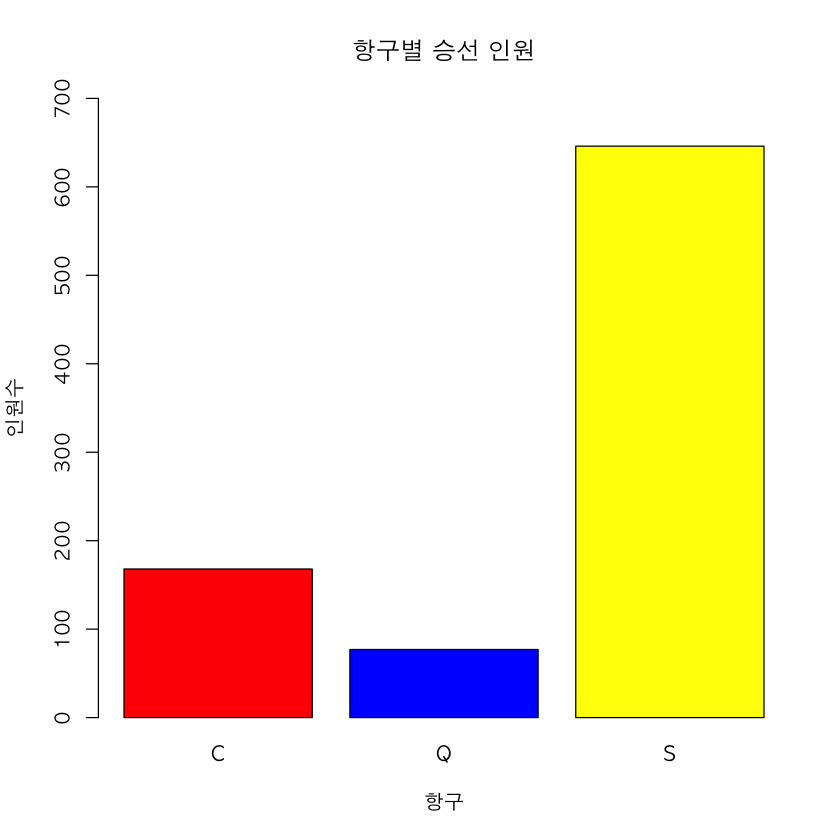

In [ ]:
# 항구별 승선인원
par(bg='white', family='AppleGothic')
barplot(table(train_df$Embarked),
        beside = T,
        main ='항구별 승선 인원',
        col= c('red','blue','yellow'),
        xlab = '항구',
        ylab = '인원수',
        ylim = c(0,700)
)

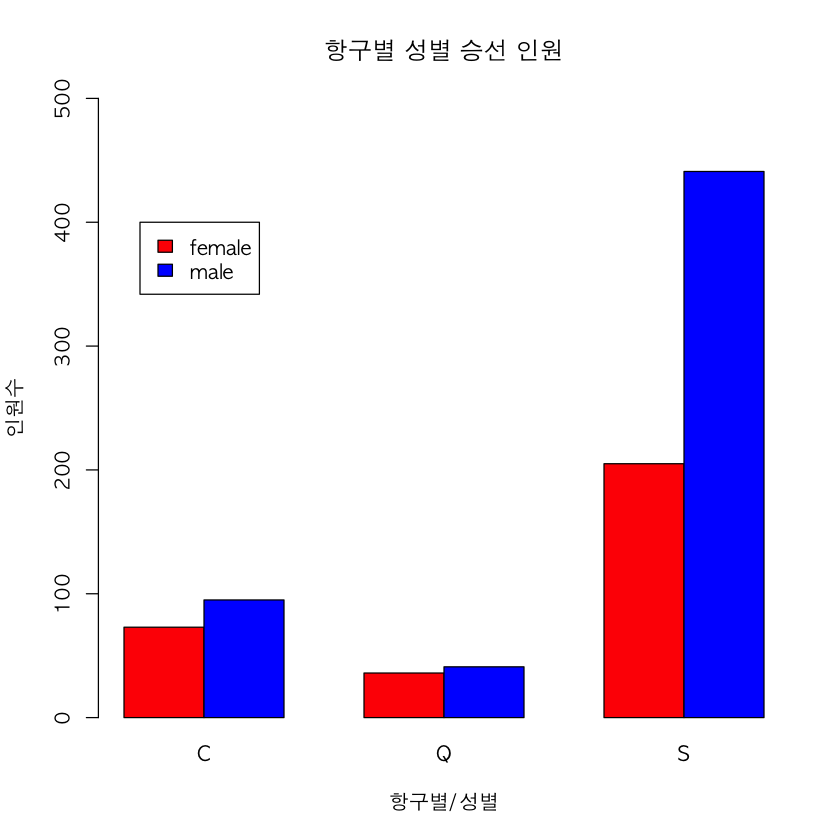

In [ ]:
# 항구별 성별 승선 인원 
par(bg='white', family='AppleGothic')
barplot(table(train_df$Sex,train_df$Embarked),
        beside = T,
        main ='항구별 성별 승선 인원',
        col= c('red','blue'),
        xlab = '항구별/성별',
        ylab = '인원수',
        ylim = c(0,500)
)
legend(1.2,400,
    c('female','male'),
    fill=c('red','blue')

)




In [ ]:
# 항구별 생존인원 
table(train_df$Survived,train_df$Embarked)

   
      C   Q   S
  0  75  47 427
  1  93  30 219

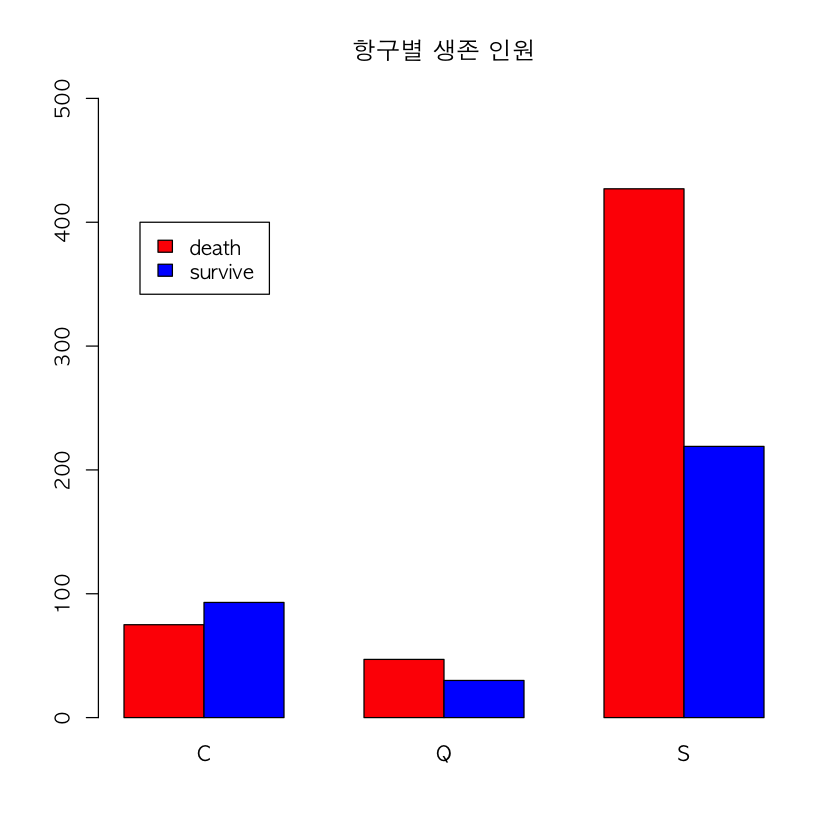

In [ ]:
par(bg='white', family='AppleGothic')
barplot(table(train_df$Survived,train_df$Embarked),
        beside = T,
        main = '항구별 생존 인원',
        ylim = c(0,500),
        col = c('red','blue')
)
# 범례
legend(1.2,400,
    c('death','survive'),
    fill=c('red','blue')

)

In [ ]:
# c항구 쉘브르는 부유계층이 많이 타서 1등급 객실의 비율이 높다 할 수 있다


In [ ]:
table(train_df$Pclass,train_df$Embarked)

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

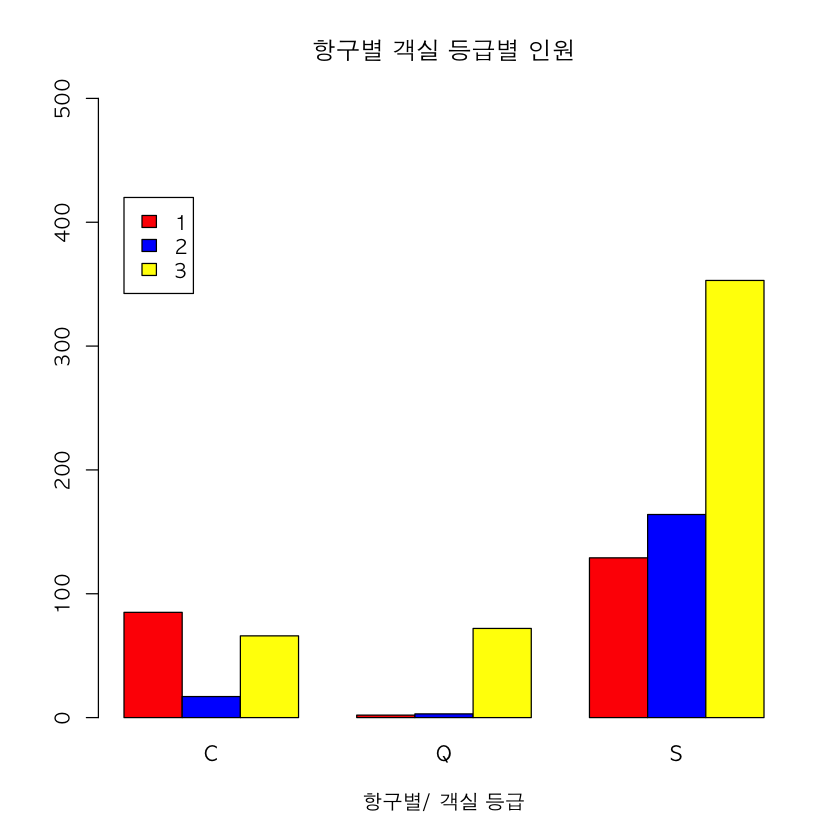

In [ ]:
par(bg='white', family='AppleGothic')
barplot(table(train_df$Pclass,train_df$Embarked),
    beside = T,
    main = '항구별 객실 등급별 인원',
    ylim=c(0,500),
    xlab = '항구별/ 객실 등급',
    col = c('red','blue','yellow')
)
legend(1,420,
    c(1,2,3),
    fill=c('red','blue','yellow')
)

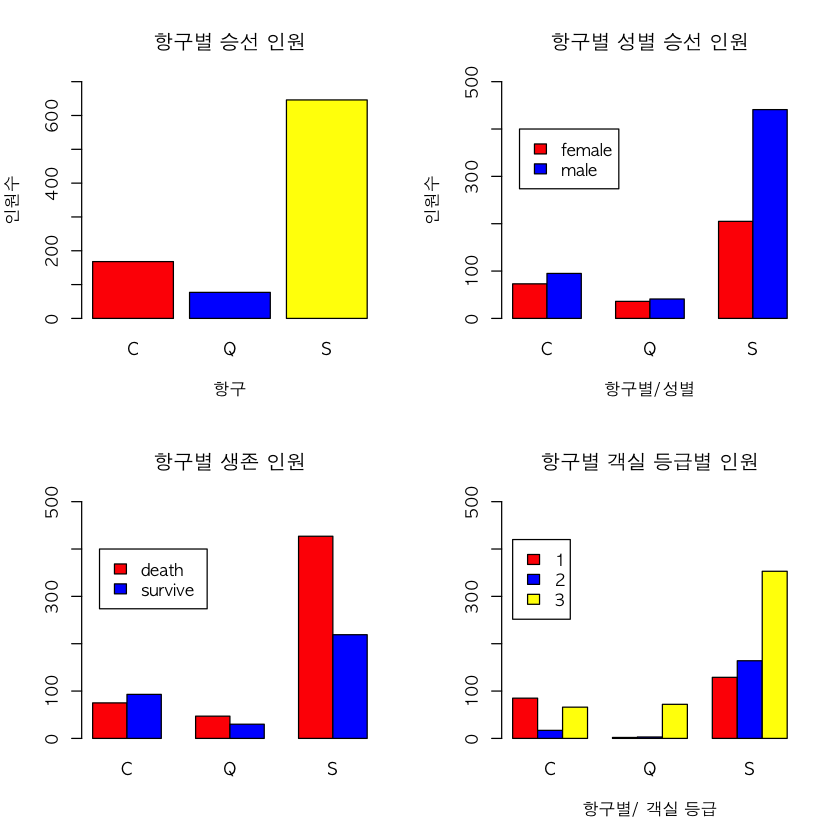

In [ ]:
#그래프 한눈에 보기 
par(family = 'AppleGothic', bg = 'white' ,mfrow=c(2,2))
barplot(table(train_df$Embarked),
        beside = T,
        main ='항구별 승선 인원',
        col= c('red','blue','yellow'),
        xlab = '항구',
        ylab = '인원수',
        ylim = c(0,700)
)
barplot(table(train_df$Sex,train_df$Embarked),
        beside = T,
        main ='항구별 성별 승선 인원',
        col= c('red','blue'),
        xlab = '항구별/성별',
        ylab = '인원수',
        ylim = c(0,500)
)
legend(1.2,400,
    c('female','male'),
    fill=c('red','blue')

)
barplot(table(train_df$Survived,train_df$Embarked),
        beside = T,
        main = '항구별 생존 인원',
        ylim = c(0,500),
        col = c('red','blue')
)
# 범례
legend(1.2,400,
    c('death','survive'),
    fill=c('red','blue')

)
barplot(table(train_df$Pclass,train_df$Embarked),
    beside = T,
    main = '항구별 객실 등급별 인원',
    ylim=c(0,500),
    xlab = '항구별/ 객실 등급',
    col = c('red','blue','yellow')
)
legend(1,420,
    c(1,2,3),
    fill=c('red','blue','yellow')
)


---
# RandomForest로 예측모델 생성

In [106]:
# 복사본 
train_df_T <-train_df

In [107]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [108]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df$Sex =='male'] <- 0
train_df_T$SexCode[train_df$Sex =='female'] <- 1

In [109]:
head(train_df_T)
tail(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [110]:
# sex 컬럼 삭제 
train_df_T <- subset(train_df_T,select=-Sex)
head(train_df_T )

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [111]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


### Embarked를 숫자로 전환 
C =0 ,S=1,Q =2 -> 맞긴 맞지만 좋은 생각이 아니다 
2 * S = Q ?
S + S = Q ?

### One-hot Encoding
C == [1,0,0]
S == [0,1,0]
Q == [0,0,1]
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.
R은 내부적으로 1 = true, 0 = false

In [112]:
# 해당하면 true , 아님 false 
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"

head(train_df_T[c('Embarked',"Embarked_C","Embarked_S","Embarked_Q")])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [113]:
target_col = c("Survived","Pclass","SexCode","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [114]:
# dataset
train_data <- train_df_T[,target_col]

In [115]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [116]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [117]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [118]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [129]:
# sampling 
set.seed(1234)
samp <- createDataPartition(train_data$Survived,p=0.7,list=F)

In [130]:
# 학습용 
data.tr <- train_data[samp,]
str(data.tr)

'data.frame':	624 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [131]:
# 검증용
data.test <- train_data[-samp,]
str(data.test)

'data.frame':	267 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 3 3 1 1 3 3 3 ...
 $ SexCode   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [132]:
#랜덤포레스트를 이용한 학습시키기 
model.rf <- randomForest(Survived~ .,data=data.tr, ntree=100)

In [133]:
# 문제와 정답
x <- subset(data.test,select =-Survived)
y<- data.test$Survived

In [134]:
#  검증하기 
pred <- predict(model.rf,x)

In [135]:
# 주관식 
head(pred)

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

In [136]:
# 객관식 
pred[pred<=0.5] <- 0 
pred[pred> 0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0

In [137]:
mean(pred == y)

[1] 0.7790262

---
# Survived를 factor로 변환 후 randomForest 실행


In [138]:
data.tr$Survived <- as.factor(data.tr$Survived )
data.test$Survived <- as.factor(data.test$Survived )

In [140]:
rf <- randomForest(Survived ~., data=data.tr, ntree =100)

In [141]:
x <- subset(data.test,select =-Survived)
y<- data.test$Survived

In [142]:
pred <- predict(rf,x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [143]:
# 예측력과 오분류표 
mean(pred == y)
table(pred,y)
table(y)

# 사망 0 은 10명을 제외하고 156면 맞췄지만 생존자는 52명을 맞추고 49명 틀림 

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

y
  0   1 
166 101 

In [144]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [145]:
library(caret)
library(e1071)
library(nnet)
library(party)
library(randomForest)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


---
# 예측하기 

In [146]:
# 모델별로 비교해보기 
# 인공신경망 
model.nnet <- nnet(Survived ~ ., data = data.tr, size=2) 
pred <- predict(model.nnet, x,type="class")
mean(pred == y)
table(pred,y)

# ctree
model.ctree <- ctree(Survived ~ ., data = data.tr) 
pred <- predict(model.ctree, x)
mean(pred == y)
table(pred,y)

# svm
model.svm <- svm(Survived ~ ., data = data.tr) 
pred <- predict(model.svm, x)
mean(pred == y)
table(pred,y)

# 로지스틱 회귀
model.multinom <- multinom(Survived ~ ., data = data.tr) 
pred <- predict(model.multinom, x)
mean(pred == y)
table(pred,y)


# weights:  15
initial  value 425.963931 
iter  10 value 270.931163
iter  20 value 261.950497
iter  30 value 260.497963
iter  40 value 260.446568
iter  50 value 260.424585
iter  60 value 260.398640
iter  70 value 260.225208
iter  80 value 259.340910
iter  90 value 259.164062
iter 100 value 259.151716
final  value 259.151716 
stopped after 100 iterations


[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

[1] 0

                   y
pred                 0  1
  0.116380957104575 12  2
  0.116386337998466 77 12
  0.11779275608489  22  6
  0.234132090156662  8  2
  0.28010098534377   1  0
  0.322919466366066 15 14
  0.355679606340091 15  8
  0.378805753548069  6  5
  0.676897324033874  3  6
  0.772499001533447  4  6
  0.930139461449184  2 15
  0.935356136660975  0 15
  0.989543590144031  0  1
  0.994827937704109  1  9

# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged


[1] 0.7715356

    y
pred   0   1
   0 135  30
   1  31  71

In [156]:
# svm
model.svm <- svm(Survived ~ ., data = data.tr) 
pred <- predict(model.svm, x)
pred[pred <=0.5] <- 0
pred[pred >0.5] <- 1
mean(pred == y)
table(pred,y)

ERROR: Error in eval(predvars, data, env): 객체 'Pclass'를 찾을 수 없습니다


In [148]:
testing <- train_data
testing$p1_f= testing$Pclass==1 & testing$SexCode==1
testing$p2_f= testing$Pclass==2 & testing$SexCode==1
testing$p3_f= testing$Pclass==3 & testing$SexCode==1
testing$p1_m= testing$Pclass==1 & testing$SexCode==0
testing$p2_m= testing$Pclass==2 & testing$SexCode==0
testing$p3_m= testing$Pclass==3 & testing$SexCode==0

In [149]:
testing <- testing[,-c(2,3)]
head(testing)

Survived,Embarked_C,Embarked_S,Embarked_Q,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [150]:
samp <- createDataPartition(testing$Survived,p=0.7,list=F)
testing.tr <- testing[samp,]
testing.test <- testing[-samp,]
x <- subset(testing.test,select=-Survived)
y <- testing.test$Survived

model.multinom <- multinom(Survived ~ ., data =testing.tr) 
pred <- predict(model.multinom, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  11 (10 variable)
initial  value 432.523841 
iter  10 value 275.299763
final  value 274.289408 
converged


[1] 0.7977528

    y
pred   0   1
   0 155  45
   1   9  58

In [151]:
testing2 <- train_df_T
testing2 <- subset(testing2,!is.na(testing2$Age))
# 나이별 클래스 컬럼 추가
testing2$p1_c = testing2$Age<20&testing2$Pclass==1
testing2$p2_c = testing2$Age<20&testing2$Pclass==2
testing2$p3_c = testing2$Age<20&testing2$Pclass==3
testing2$p1_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==1
testing2$p2_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==2
testing2$p3_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==3
testing2$p1_e = testing2$Age>=60&testing2$Pclass==1
testing2$p2_e = testing2$Age>=60&testing2$Pclass==2
testing2$p3_e = testing2$Age>=60&testing2$Pclass==3

# 가족 동행 컬럼 추가
testing2$가족 = apply(cbind(testing2$SibSp,testing2$Parch),1,sum)
table(testing2$가족)

# 승선지와 클래스 관련 컬럼 추가
# testing2$p1_C = testing2$Pclass==1 & testing2$Embarked_C == T
# testing2$p2_C = testing2$Pclass==2 & testing2$Embarked_C == T
# testing2$p3_C = testing2$Pclass==3 & testing2$Embarked_C == T
# testing2$p1_S = testing2$Pclass==1 & testing2$Embarked_S == T
# testing2$p2_S = testing2$Pclass==2 & testing2$Embarked_S == T
# testing2$p3_S = testing2$Pclass==3 & testing2$Embarked_S == T
# testing2$p1_Q = testing2$Pclass==1 & testing2$Embarked_Q == T
# testing2$p2_Q = testing2$Pclass==2 & testing2$Embarked_Q == T
# testing2$p3_Q = testing2$Pclass==3 & testing2$Embarked_Q == T

# 클래스랑 성별 컬럼 추가
testing2$p1_f= testing2$Pclass==1 & testing2$SexCode==1
testing2$p2_f= testing2$Pclass==2 & testing2$SexCode==1
testing2$p3_f= testing2$Pclass==3 & testing2$SexCode==1
testing2$p1_m= testing2$Pclass==1 & testing2$SexCode==0
testing2$p2_m= testing2$Pclass==2 & testing2$SexCode==0
testing2$p3_m= testing2$Pclass==3 & testing2$SexCode==0

colna <- c('Survived','가족','p1_c',
          'p2_c','p3_c','p1_a','p2_a','p3_a','p1_e','p2_e','p3_e','p1_f','p2_f','p3_f','p1_m','p2_m','p3_m'
#           ,'p1_C','p2_C','p3_C','p1_S','p2_S','p3_S','p1_Q','p2_Q','p3_Q')
           )
#testing2 <- testing2[,c(2,3,12:19)]
testing2 <- testing2[,colna]
head(testing2)


  0   1   2   3   4   5   6   7 
404 139  93  27  11  22  12   6 

,Survived,가족,p1_c,p2_c,p3_c,p1_a,p2_a,p3_a,p1_e,p2_e,p3_e,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
1,0,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,0,0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,0,4,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
7,0,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [152]:
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 227.686352
iter  20 value 222.673540
iter  30 value 222.657183
final  value 222.657160 
converged


[1] 0.7990654

    y
pred   0   1
   0 114  41
   1   2  57

In [153]:
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 214.378282
final  value 213.854491 
converged


[1] 0.8037383

    y
pred   0   1
   0 123  34
   1   8  49

In [155]:
table(train_df$Embarked,train_df$Pclass)

   
      1   2   3
      0   0   0
  C  85  17  66
  Q   2   3  72
  S 129 164 353